In [251]:
import pandas as pd

df = pd.read_csv('../game/output.csv', usecols=['win', 'time', 'points', 'enemy_algorithm'])

In [252]:
features = ['win', 'time']
target = 'points'
sample_df = df[-5:]
df = df[:-5]
x = df[features]
y = df[target]

win_df = df[df.win == True]
lose_df = df[df.win == False]

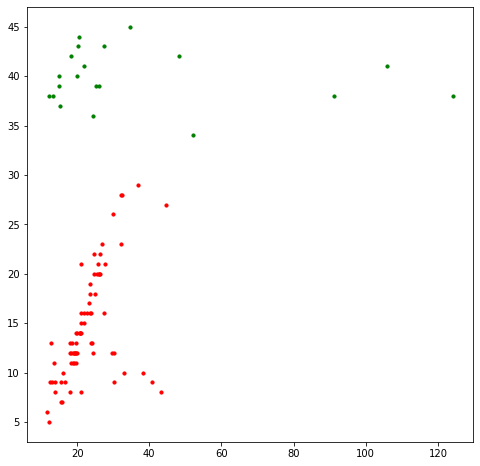

In [253]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (8, 8))
win_sc = plt.scatter(win_df['time'], win_df['points'], s=10, color="green")
lose_sc = plt.scatter(lose_df['time'], lose_df['points'], s=10, color="red")

In [254]:
from sklearn import linear_model

regression = linear_model.LinearRegression()

regression.fit(df[features], df[target])

LinearRegression()

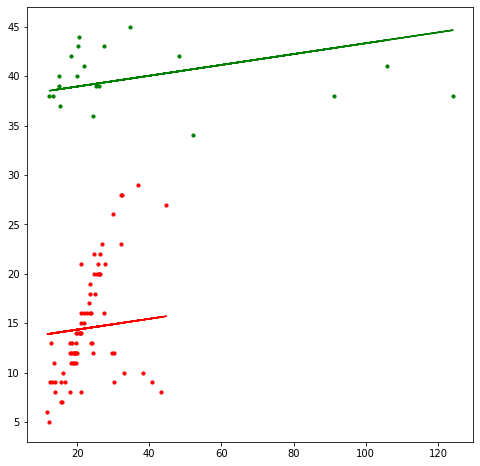

In [255]:
fig = plt.figure(figsize = (8, 8))
win_sc = plt.scatter(win_df['time'], win_df['points'], s=10, color="green")
lose_sc = plt.scatter(lose_df['time'], lose_df['points'], s=10, color="red")
plt.plot(win_df['time'], regression.predict(win_df[features]), color="green")
plt.plot(lose_df['time'], regression.predict(lose_df[features]), color="red")

In [256]:
predict_table = pd.DataFrame(columns=['win', 'time', 'actual_points', 'predicted_points'])
predict_table.win = sample_df.win
predict_table.time = sample_df.time
predict_table.actual_points = sample_df.points
predict_table.predicted_points = regression.predict(sample_df[features])

In [257]:
predict_table

,win,time,actual_points,predicted_points
95,True,29.689670,40,39.473531
96,False,19.530325,12,14.321915
97,False,15.058327,9,14.076901
98,True,16.820545,41,38.768450
99,False,15.680037,7,14.110963
